In [58]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

from scrape.files import get_data_files

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 250

# Get data files 2022-23
files = get_data_files("data/samples", extension=".csv")

df = pd.concat([pd.read_csv(fp, index_col=0) for fp in sorted(files)])

# Drop duplicates from overlapping dates
df = df[~df.index.duplicated(keep="last")]

df.index = pd.to_datetime(df.index)

In [59]:
df["error"] = df["Forecast Carbon Intensity (gCO2/kWh)"].sub(df["Actual Carbon Intensity (gCO2/kWh)"])
df["percentage error"] = 100. * df["error"].div(df["Actual Carbon Intensity (gCO2/kWh)"])
df.head()

,Actual Carbon Intensity (gCO2/kWh),Forecast Carbon Intensity (gCO2/kWh),Index,error,percentage error
Datetime (UTC),,,,,
2022-01-01 00:00:00+00:00,71.0,83,low,12.0,16.901408
2022-01-01 00:30:00+00:00,74.0,74,low,0.0,0.000000
2022-01-01 01:00:00+00:00,75.0,70,low,-5.0,-6.666667
2022-01-01 01:30:00+00:00,73.0,70,low,-3.0,-4.109589
2022-01-01 02:00:00+00:00,68.0,61,low,-7.0,-10.294118


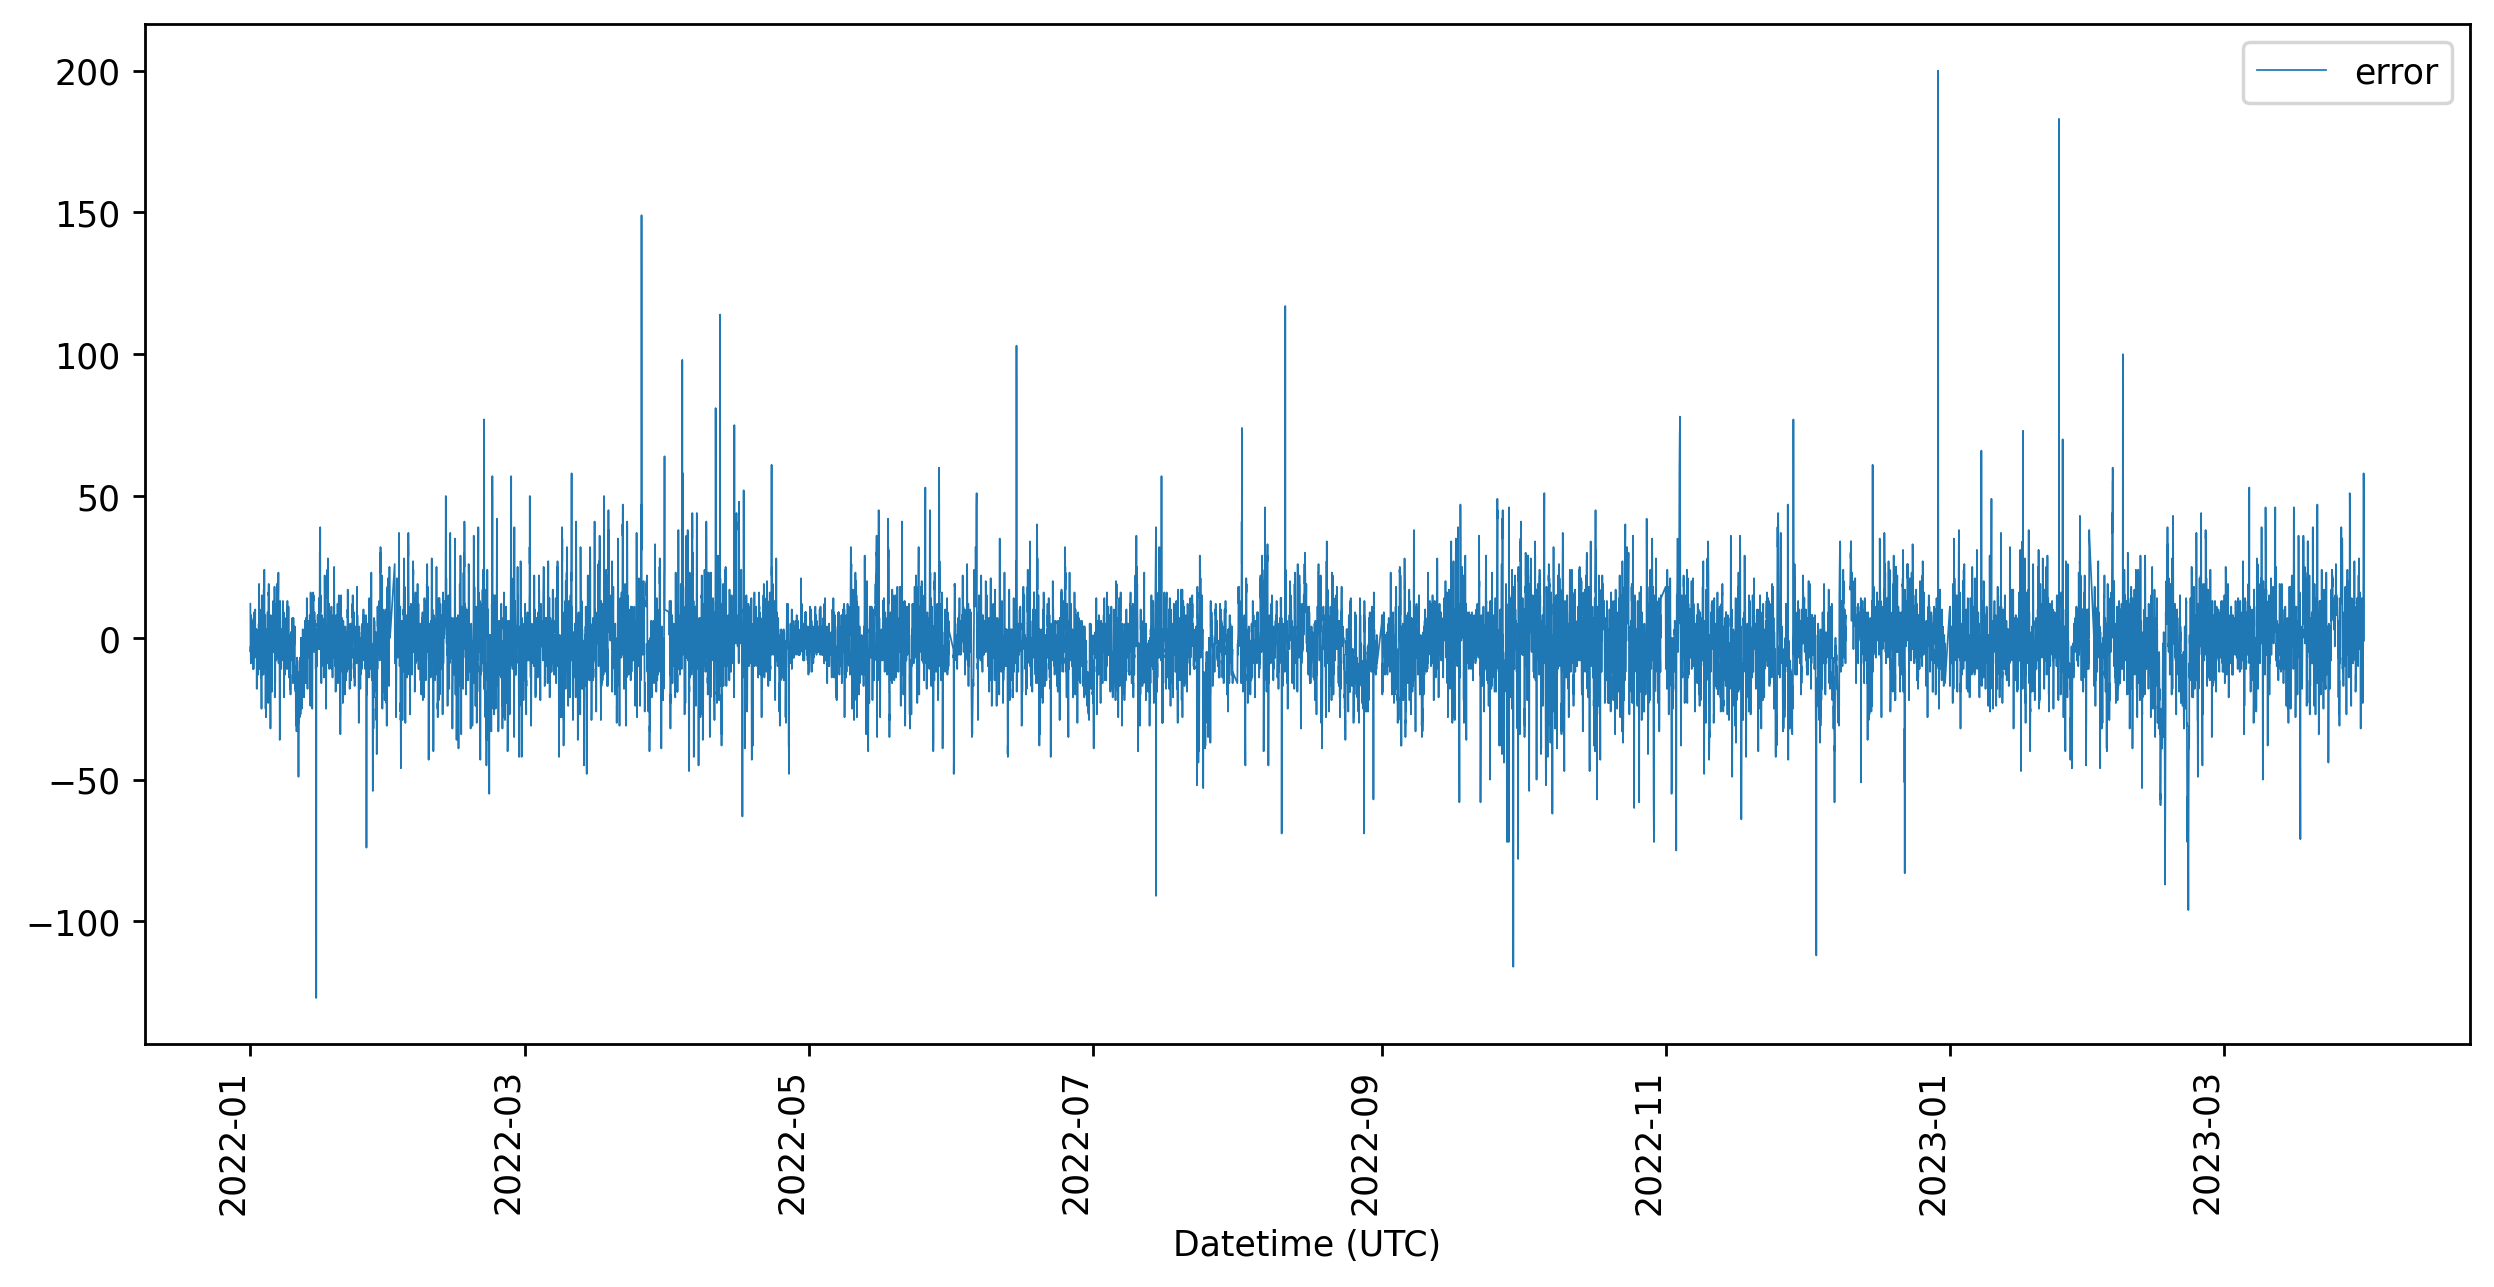

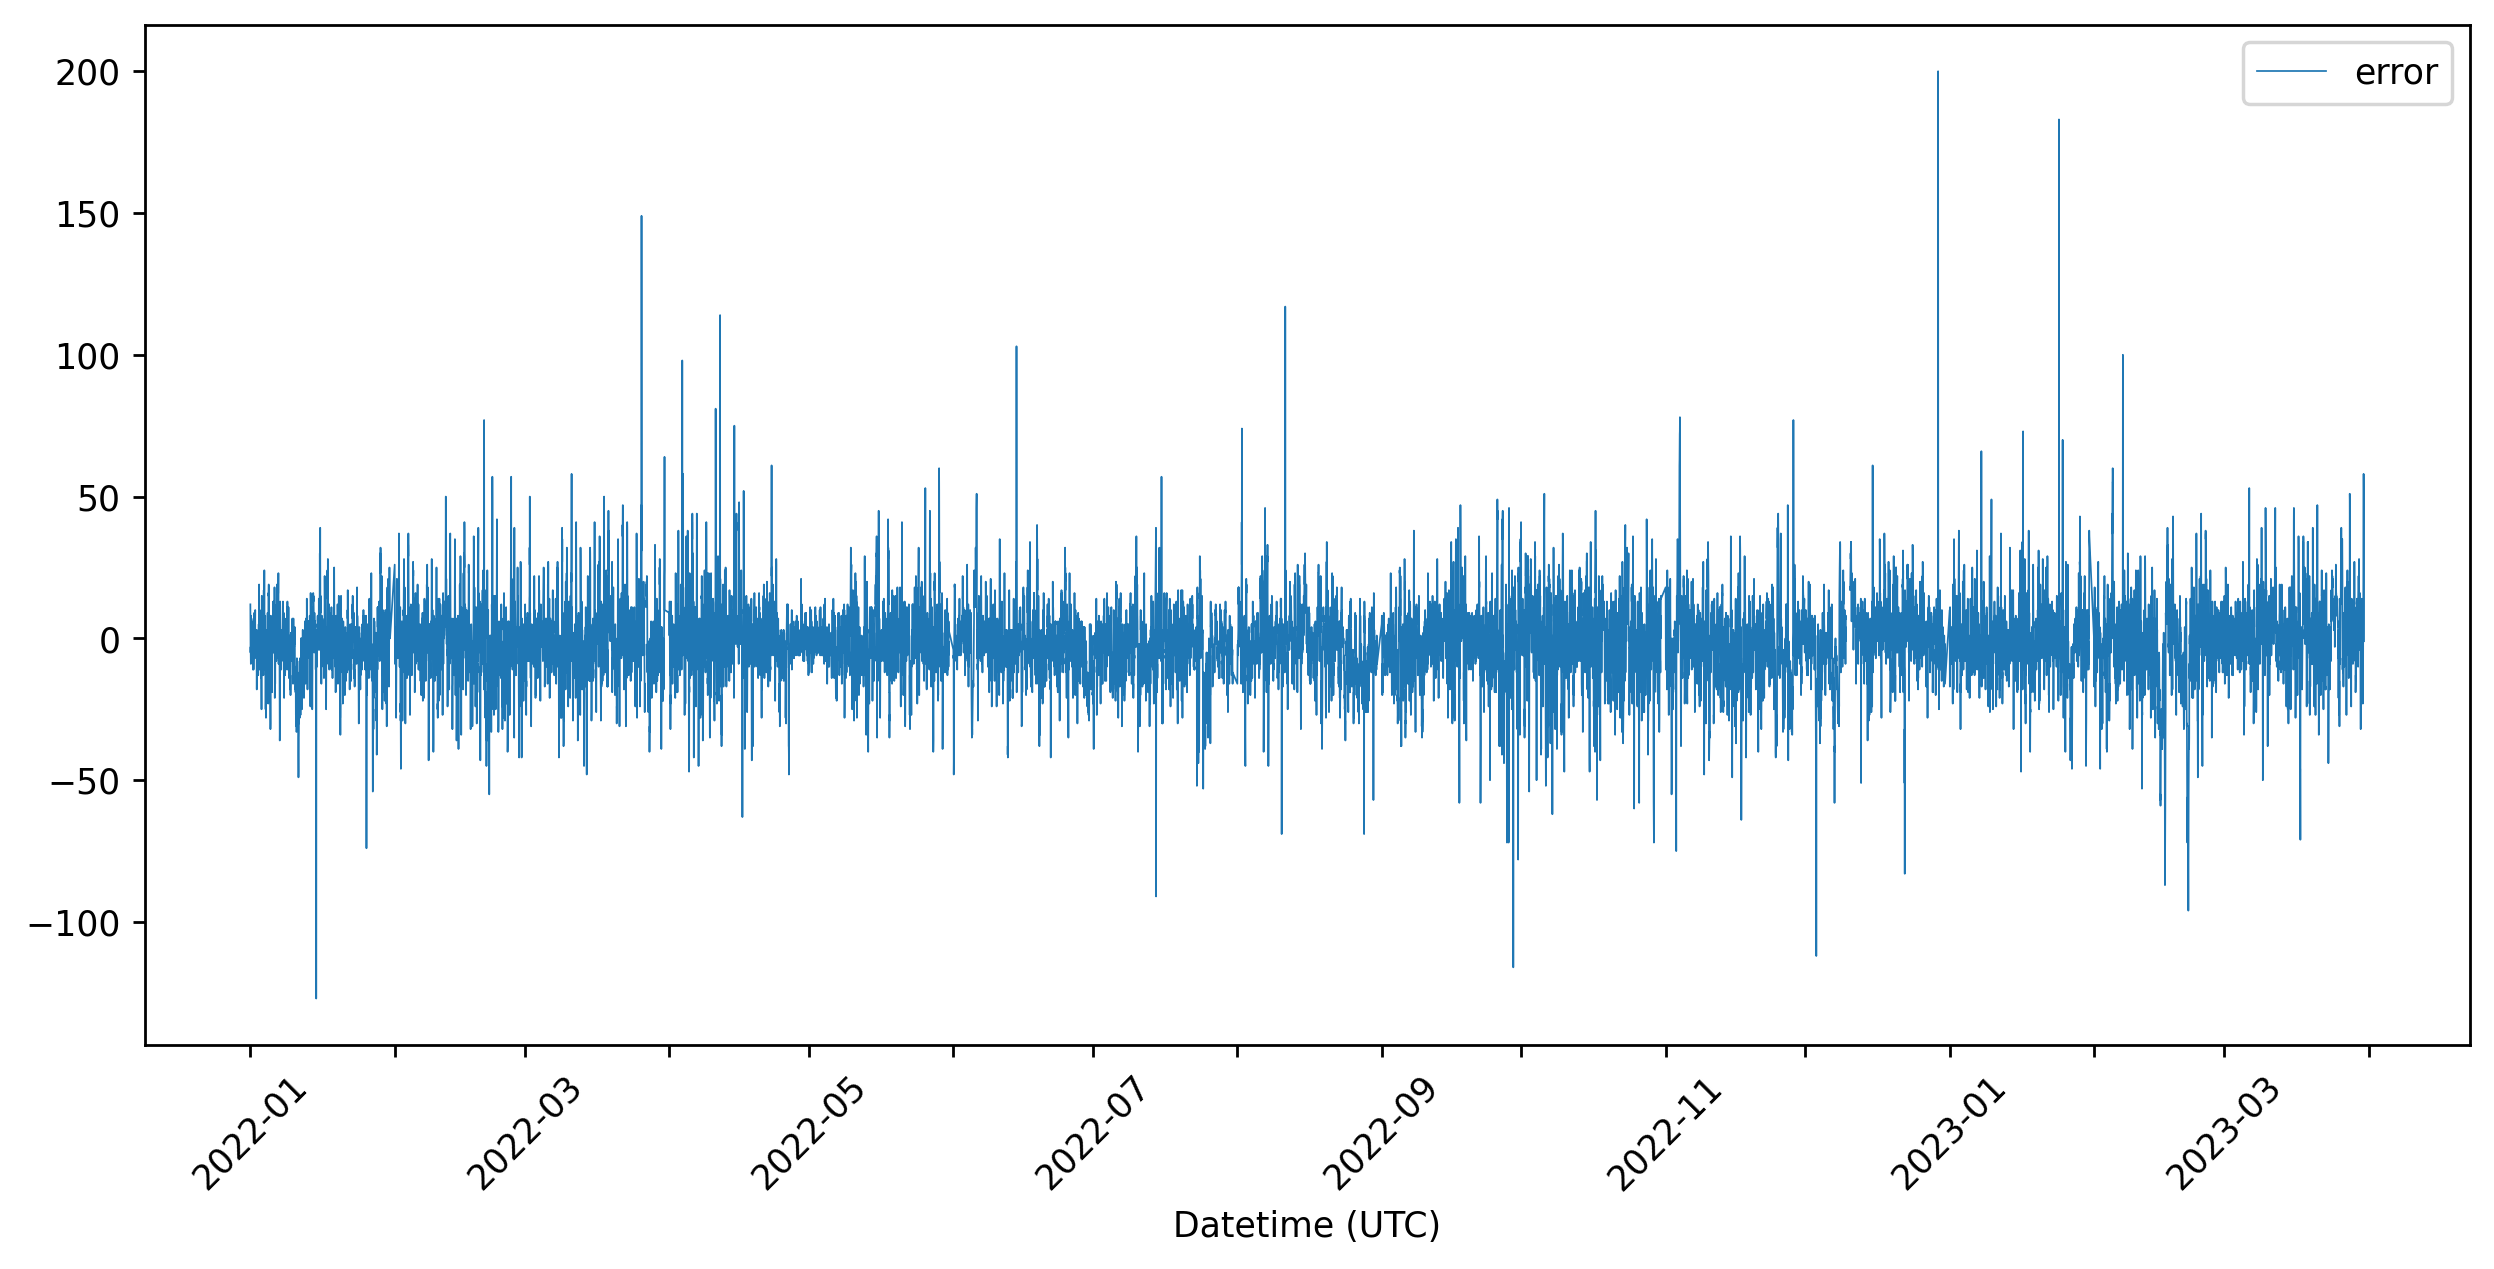

In [76]:
import matplotlib.dates as mdates

locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter("%Y-%b")

# from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# majorLocator   = MultipleLocator(30)
# majorFormatter = FormatStrFormatter('%d')
# minorLocator   = MultipleLocator(1)

ax = df.plot(use_index=True, y="error", linewidth=0.5)

xticks = ax.get_xticks()
xlabels = ax.get_xticklabels()

ax.set_xticks(xticks, xlabels, rotation=45, ha="center")

ax.xaxis.set_major_locator(locator)
# ax.set_xticklabels()

# ax.xaxis.set_major_formatter(fmt)

# ax.xaxis.set_major_locator(majorLocator)
# ax.xaxis.set_major_formatter(majorFormatter)
# ax.xaxis.set_minor_locator(minorLocator)

# ax.xaxis.set_major_formatter(plt.NullFormatter())
# ax.xaxis.set_major_locator(plt.MaxNLocator(24))

# dtFmt = mdates.DateFormatter('%Y-%b') # define the formatting
# plt.gca().xaxis.set_major_formatter(dtFmt)
# # show every 12th tick on x axes
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=10))
# plt.xticks(rotation=90, fontweight='light',  fontsize='x-small',)

In [51]:
df.index.dtype

dtype('O')